# Tutorial 8.1: Pattern Completion and Pattern Separation via Hebbian Learning
### Neuroscience goals:
- produce a powerful model of associative learning in the brain
- gain awareness of how different synaptic plasticity parameters impact such learning
### Computational goals:
- convert matrices to vectors and back
- implement matrix multiplication to calculate the results of multiple integrals

### Overview
- will train a circuit undergoing Hebbian synaptic plasticity with many approximate examples of four distinct input patterns
    - then test whether circuit reproduces desired pattern when presented with new approximations to each pattern
- system is a type of autoassociative network, (Hopfield network is best-known example)
- these networks have the property of pattern completion (retrieve complete pattern given partial input)
    - and pattern separation (produce distinct responses to similar inputs according to learned pattern most similar to input)
- learned patterns become attractor states of the network

### 1a. 
- define four 17x17 matrices, whose entries are 1s and 0s arranged in a distinct, recognizeable pattern
- i'm using the same patterns from figure 8.3

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [64]:
pattern1 = np.array([
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
])

pattern2 = np.array([
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
])

pattern3 = np.array([
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
])

pattern4 = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
])

### 1b. set up a loop of 400 trials, and on each trial:
-  select at random one of the four patterns to be the input
- randomly, with probability = 0.1, flip entries from 0 to 1 or 1 to 0, to generate a corrupted pattern (`input_pattern`), with an average 90% overlap with the original pattern
- assign each element of `input_pattern` to produce the applied current to a particular unit (will have $17^2 = 289$ units)
- simulate for 1s the set of firing rate units whose activity will be stored in an array of size ($N_T \times N_{units}$), where $N_T$ is number of time points, using:
$$
\tau_r \frac{dr_i}{dt} = -r_i + \frac{r_{max}}{1 + \exp[-(I_i - I_{thresh}) / \Delta_I]}
$$

$$
I_i = \sum^{N_{units}}_{j=1} r_j W_{ji} + I^{(app)}_i (t)
$$

use parameters: $\tau_r = 10$ ms, $r_{max} = 50$ Hz, $I_{thresh} = 10$, $\Delta_I = 1$

- initially, the connetion matrix between units, $W_{ji}$ provides uniform inhibition with $W_{ji} = -0.3 / N_{units}$ identical across all connections
- all firing rates should be initialized to 0
- applied current, $I_i^{(app)} (t)$, should be only present for the first 0.5s of the trial
- its value is 50 for those units, $i$, receiving input (i.e., those units whose entry in `input_pattern` is 1) and it's value is 0 otherwise

- at the end of each trial, alter the connection strengths according to the following rule:

$$

\Delta W_{ji} = \epsilon_{+} \int_{t=0}^{t=1} \Theta (r_j - r_T)\cdot \Theta (r_i - r_T)dt - \epsilon_{-} \int_{t=0}^{t=1} \Theta (r_T - r_j)\cdot \Theta (r_i - r_T)dt

$$

where the time integrals are across the trials of 1s, $r_T$ = 25Hz, $ \epsilon_{+}$ = 0.1 / $N_{units}$ and $ \epsilon_{-}$ = $ \epsilon_{+} / 4 $

- in this equation, the rate of the presynaptic cell is $r_j$ and the rate of the postsynaptic cell is $r_i$
- the Heaviside functions, for example $\Theta (r_i - r_T)$, give 1 if the term in parenthesis is greater than 0, and otherwise give 0
- parameters $ \epsilon_{-}$ and $ \epsilon_{+} $ determine the rate of plasticity - if too slow, more trials are needed, if too fast, random errors are imprinted in the circuit


- these integrals can be evaluated rapidly via matrix multiplication

- ensure no connection strengths pass beyond a maximum value of $W_{max} = 8 / N_{units}$, or a minimum value of $W_{min} = -8 / N_{units}$, by clamiping to these values if necessary

In [65]:
# parameters
dt = 1e-3
t = np.arange(0, 1, dt)
tau_r = 10e-3
r_max = 50
i_thresh = 10
delta_i = 1

n_units = 17*17
w_ji_init = -0.3 / n_units
epsilon_plus = 0.1 / n_units
epsilon_minus = epsilon_plus / 4
r_t = 25

patterns = [pattern1, pattern2, pattern3, pattern4]

# connectivity matrix
w_ji = np.full((n_units, n_units), w_ji_init)


In [66]:
# functions
def f(i):
    return r_max / (1 + np.exp(-(i - i_thresh) / delta_i))

def update_r(r, i_app, w, tau_r=tau_r):
    i_total = np.dot(w, r) + i_app
    return (-r + f(i_total)) / tau_r

def hebbian_integral(r_i, r_j, epsilon_plus, epsilon_minus):
    
    theta1 = (r_j > r_t).astype(int)
    theta2 = (r_i > r_t).astype(int)
    theta3 = (r_t > r_j).astype(int)

    integral_plus = theta1 @ theta2.T * dt
    integral_minus = theta2 @ theta3.T * dt

    delta_w_ji = epsilon_plus * integral_plus - epsilon_minus * integral_minus
    return delta_w_ji

def hebbian_integral_matrix(r, epsilon_plus, epsilon_minus):

    theta1 = (r > r_t).astype(int)
    theta2 = theta1.copy()  # since r_i and r_j are the same in this context
    theta3 = (r_t > r).astype(int)

    integral_plus = theta1 @ theta2.T * dt
    integral_minus = theta2 @ theta3.T * dt

    delta_w_ji = epsilon_plus * integral_plus - epsilon_minus * integral_minus

    return delta_w_ji


In [68]:
# connectivity matrix
w_ji = np.full((n_units, n_units), w_ji_init)

on trial 0


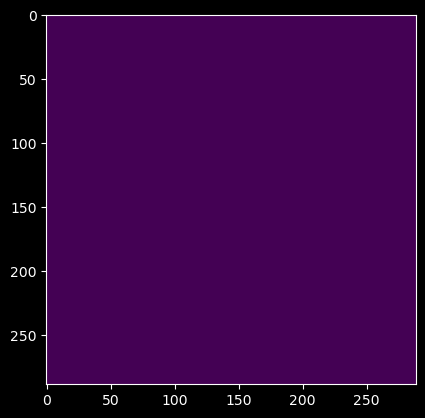

on trial 50


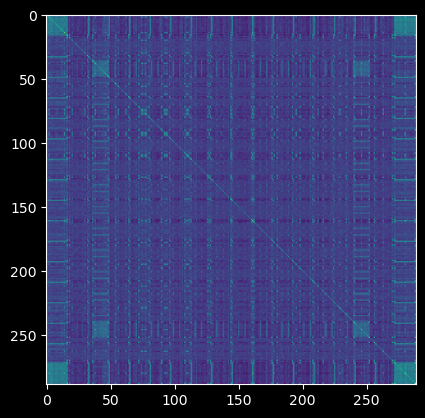

on trial 100


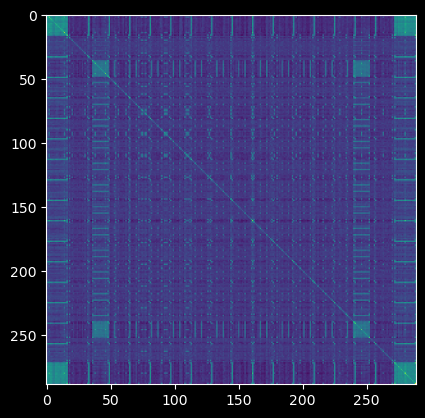

on trial 150


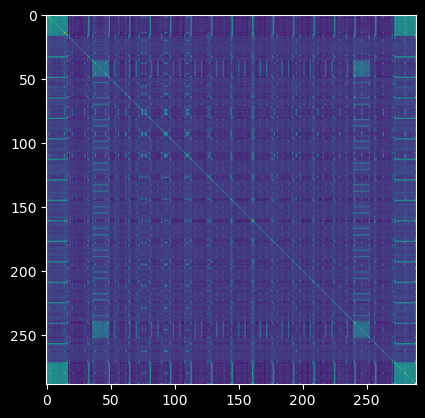

on trial 200


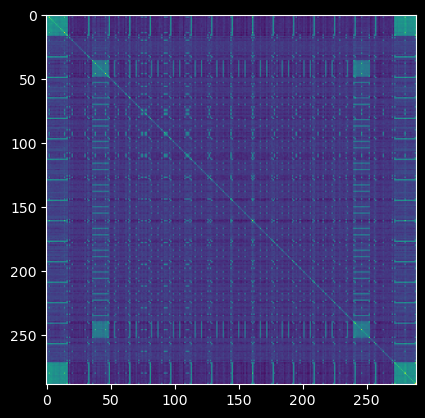

on trial 250


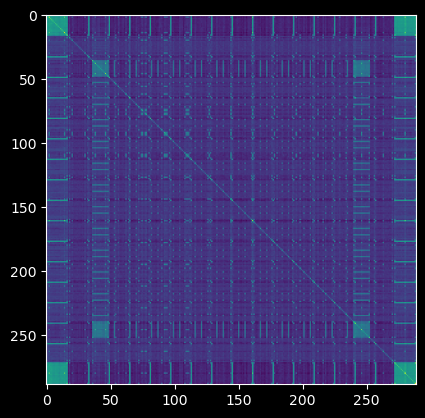

on trial 300


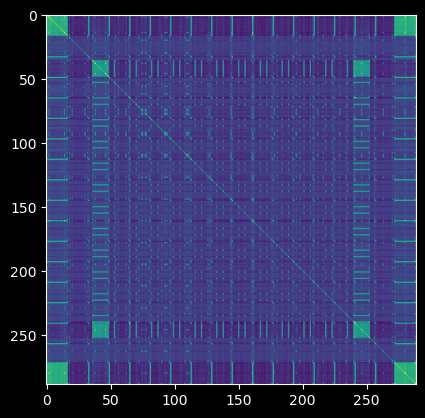

on trial 350


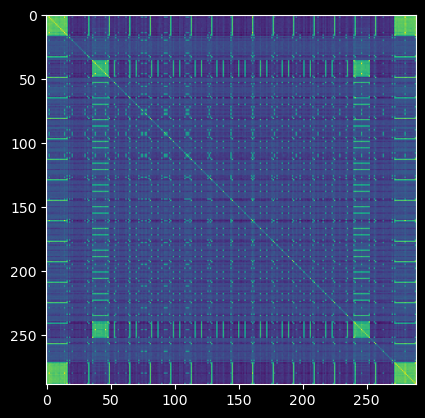

In [69]:
wmin = -8 / n_units
wmax = 8 / n_units

for trial in range(400):
    if trial % 50 == 0:
        print('on trial', trial)
        plt.imshow(w_ji)
        plt.show()
    # select pattern
    pattern = patterns[np.random.choice(len(patterns))]

    # corrupt the patten
    flip_indices = np.random.rand(*pattern.shape) < 0.1 # 10% probability
    input_pattern = np.where(flip_indices, 1 - pattern, pattern)

    # assign to applied current
    i_app = np.zeros((n_units, len(t)))
    i_app[:, :int(len(t) / 2)] = 50 * input_pattern.reshape(n_units, 1)

    # initialize firing rates
    r = np.zeros((n_units, len(t)))

    # simulate neurons
    for time in range(1, len(t)):
        i_i = np.dot(r[:, time-1], w_ji) + i_app[:, time-1]
        drdt = update_r(r[:, time-1], i_app[:, time-1], w_ji, tau_r)
        r[:, time] = r[:, time-1] + drdt * dt 

    # compute weight updates
    delta_w = hebbian_integral_matrix(r, epsilon_plus, epsilon_minus)
    
    # update weights and clamp
    w_ji += delta_w
    w_ji = np.clip(w_ji, wmin, wmax)

### 1c. test learning
- simulate four new trials, one for each input pattern, but now with 20% of the entries to the input matrix flipped

- plot the set of firing rates at the end of the simulation (the last time point), carefully assigning the rate of the unit labeled $i$ to it's correct location on the 17x17 grid (e.g., using `reshape`)

In [70]:
def corrupt_pattern(pattern, prob):
    flip_indices = np.random.rand(*pattern.shape) < prob
    corrupted_pattern = np.copy(pattern)
    corrupted_pattern[flip_indices] = 1 - corrupted_pattern[flip_indices]
    return corrupted_pattern


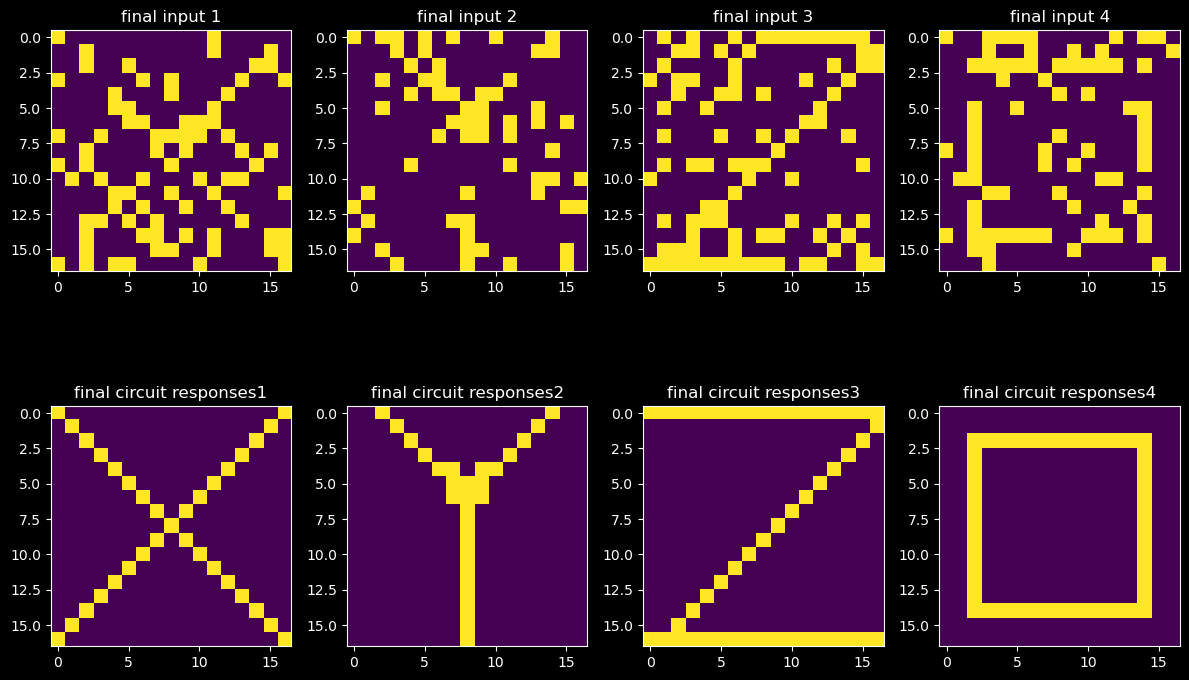

In [76]:
final_firing_rates = []

plt.figure(figsize=(12, 8))

for idx, pattern in enumerate(patterns):
    corrupted_input = corrupt_pattern(pattern, 0.2)
    i_app = np.zeros((n_units, len(t)))
    i_app[:, :int(0.5 / dt)] = 50 * corrupted_input.reshape(n_units, 1)
    
    r = np.zeros((n_units, len(t)))

    for time in range(1, len(t)):
        
        i_i = np.dot(r[:, time-1], w_ji) + i_app[:, time-1]
        drdt = update_r(r[:, time-1], i_app[:, time-1], w_ji, tau_r)
        r[:, time] = r[:, time-1] + drdt * dt 
            
    final_firing_rates.append(r[:, -1])

    plt.subplot(2, 4, idx+1)
    plt.imshow(corrupted_input, cmap='viridis')
    plt.title(f"final input {idx+1}")

    # Plot final firing rates
    reshaped_rates = final_firing_rates[idx].reshape(17, 17)
    plt.subplot(2, 4, idx+5)
    plt.imshow(reshaped_rates, cmap='viridis')
    plt.title(f"final circuit responses{idx+1}")

plt.tight_layout()
plt.show()